In [ ]:
from datasets import load_from_disk
from pathlib import Path
import soundfile as sf
import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd

REPO_ROOT = Path.cwd().parent  # Adjust if needed
DATA_DIR = REPO_ROOT / "data" / "raw" / "voxceleb2_subset"

dataset = load_from_disk(str(DATA_DIR))
print(f"Loaded {len(dataset)} samples")

/Users/max-peterschroder/anaconda3/envs/mlsp-project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 10000 samples


In [17]:
df = pd.DataFrame(dataset[:10000])  # First 100 samples as DataFrame
print(f"Columns: {df.columns.tolist()}\n")
print(df[['speaker_id', 'gender', 'language']].value_counts())

Columns: ['audio_path', 'transcription', 'language', 'speaker_id', 'gender']

speaker_id  gender  language
id04684     male    en          500
id07531     male    en          500
id01101     male    en          500
id04961     female  en          499
id06870     male    en          497
id00592     female  en          410
id00752     female  en          405
id04615     female  en          400
id02477     female  en          393
id02150     male    en          373
id04652     female  en          369
id03796     male    en          356
id08795     female  en          345
id06261     female  en          289
id02783     male    en          283
id02467     female  en          276
id05990     male    en          274
id05434     female  en          259
id00908     male    en          242
id08760     male    en          241
id03361     male    en          240
id01184     female  en          236
id03701     male    en          201
id07417     male    en          177
id01995     male    en       

In [8]:
def show_sample(idx):
    sample = dataset[idx]
    
    print(f"Sample {idx}")
    print(f"Speaker: {sample['speaker_id']} ({sample['gender']})")
    print(f"Language: {sample['language']}")
    print(f"File: {sample['audio_path']['path']}")
    print(f"Transcription: {sample['transcription']}\n")
    
    # Decode audio - access the 'bytes' key
    audio_bytes = sample['audio_path']['bytes']
    audio, sr = sf.read(io.BytesIO(audio_bytes))
    duration = len(audio) / sr
    
    print(f"Duration: {duration:.2f}s | Sample rate: {sr} Hz | Shape: {audio.shape}")
    
    # Plot waveform
    plt.figure(figsize=(12, 3))
    time = np.linspace(0, duration, len(audio))
    plt.plot(time, audio, linewidth=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform - {sample["speaker_id"]}')
    plt.tight_layout()
    plt.show()
    
    # Play audio
    return Audio(audio, rate=sr)


Sample 0
Speaker: id03701 (male)
Language: en
File: 00100.wav
Transcription:  What simply sounds good and you wind up in some way trying to, you know, eventually accessing the truth about your condition.

Duration: 6.46s | Sample rate: 16000 Hz | Shape: (103424,)


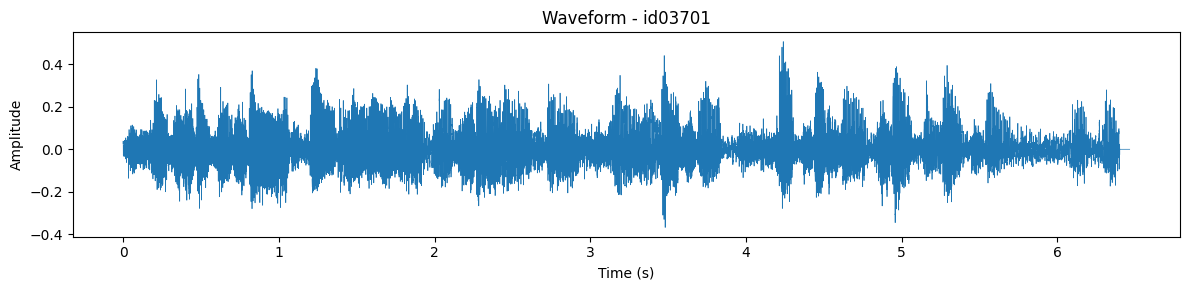


Sample 1
Speaker: id03701 (male)
Language: en
File: 00170.wav
Transcription:  informed by the life that we live and where we've been for the last 20 years. I

Duration: 4.22s | Sample rate: 16000 Hz | Shape: (67584,)


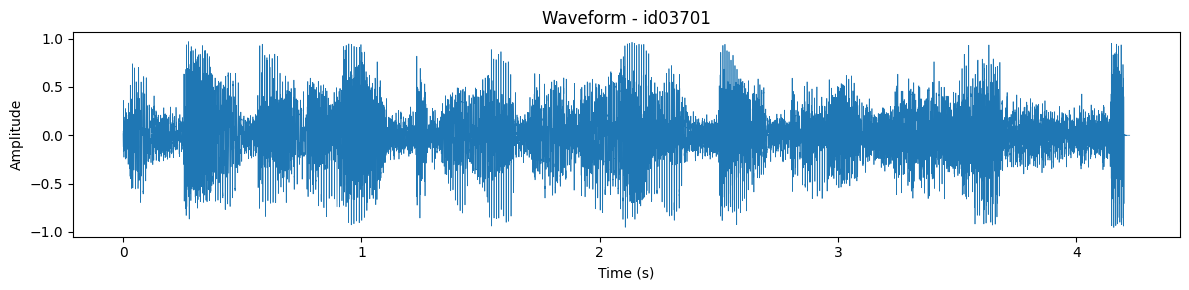


Sample 2
Speaker: id03701 (male)
Language: en
File: 00171.wav
Transcription:  lyric out in front and yet it really satisfied the body satisfied with this very song

Duration: 4.29s | Sample rate: 16000 Hz | Shape: (68608,)


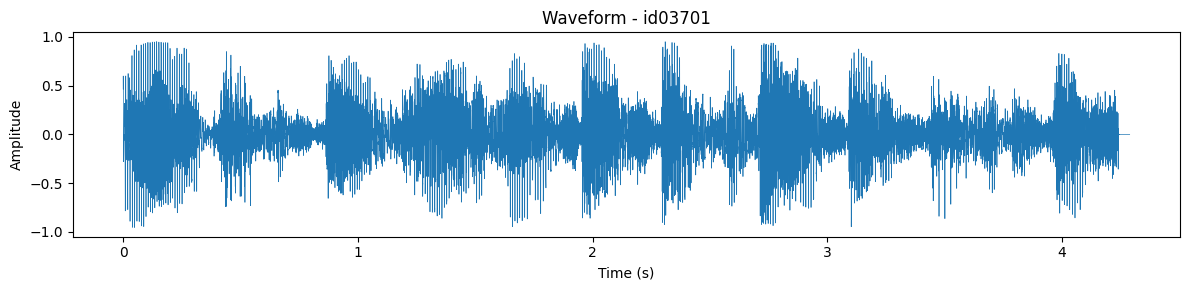

In [9]:
for i in range(3):
    print(f"\n{'='*70}")
    display(show_sample(i))

Random sample #5553
Sample 5553
Speaker: id02150 (male)
Language: en
File: 00442.wav
Transcription:  oh yeah that sounds fun  never done that before  so I presume  you know there'd be  lots of acts  and I'll do one of them  and then it

Duration: 4.99s | Sample rate: 16000 Hz | Shape: (79872,)


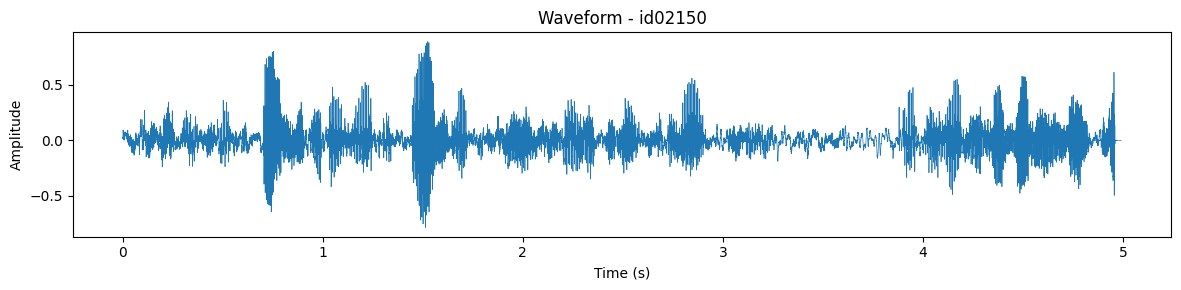

In [11]:
import random
random_idx = random.randint(0, len(dataset)-1)
print(f"Random sample #{random_idx}")
show_sample(random_idx)